<h3> Libraries <h3>

In [20]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd

<h3>Loading the  product data series from the other notebook <h3>

In [21]:

with open('product_df.pkl', 'rb') as f:
    product_df_2 = pickle.load(f)

<h3> Turning it into series data type <h3>

In [22]:
series =  pd.Series(product_df_2['Sales'])

<h3> Changing the index <h3>

In [27]:
series.reset_index(drop=True, inplace=True)

<h3> SARIMAX model training <h3>

In [28]:


# Create a pandas Series from the list
data = series
# Define the SARIMA model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Fit the model
results = model.fit(disp=False)
# Generate predictions for training dataset
predictions_train = results.get_prediction(start=0, end=len(data)-1)
pred_values_train = predictions_train.predicted_mean
confidence_intervals_train = predictions_train.conf_int()
# Generate predictions for future steps
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(data), len(data) + forecast_steps)
forecast_values = forecast.predicted_mean


<h3> Plotting the predictions for training and test <h3>

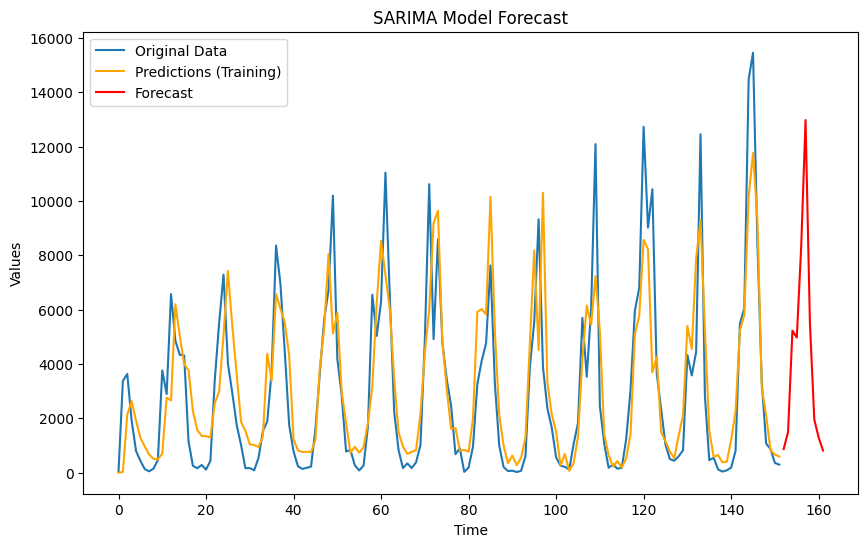

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(data.index, pred_values_train, label='Predictions (Training)', color='orange')

plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

plt.legend()
plt.title('SARIMA Model Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()